In [1]:
from langgraph.graph import StateGraph
from typing import Dict, TypedDict

In [2]:
class CustomAgentState(TypedDict):
    message : str

In [7]:
def first_node_doing(state : CustomAgentState) -> CustomAgentState:
    state["message"] = state["message"] + " | First Node Executed! "
    return state

def second_node_doing(state : CustomAgentState) -> CustomAgentState:
    state["message"] = state["message"] + " | Second Node Executed! "
    return state

In [8]:
graph = StateGraph(CustomAgentState)

graph.add_node("1st", first_node_doing)
graph.add_node("2nd", second_node_doing)

graph.add_edge("1st","2nd")

graph.set_entry_point("1st")
graph.set_finish_point("2nd")

app = graph.compile()

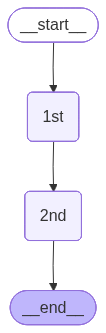

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
res = app.invoke(CustomAgentState(message="Ohho Entry! "))
res["message"]

'Ohho Entry!  | First Node Executed!  | Second Node Executed! '